<a href="https://colab.research.google.com/github/manojnahak02/Others_Github_Projects/blob/master/Webscrapping_covid19Ploting_Ritesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import bs4
import requests as req

In [3]:
url='https://www.mohfw.gov.in'

In [4]:
resp=req.get(url)
soup=bs4.BeautifulSoup(resp.content)
soup=bs4.BeautifulSoup(str(soup).replace("<!--<tbody>", "<tbody>"),"html.parser")
all_rows = soup.find_all('tr')

In [6]:
all_rows

[<tr><h5>COVID-19 INDIA <span>as on : 09 September 2020, 08:00 IST (GMT+5:30)	[↑↓ Status change since yesterday]</span></h5></tr>,
 <tr class="row1">
 <th rowspan="2" style="width:5%;"><strong>S. No.</strong></th>
 <th rowspan="2" style="width:24%;"><strong>Name of State / UT</strong></th>
 <th colspan="2" style="text-align:center;width:24%;"><strong>Active Cases*</strong></th>
 <th colspan="2" style="text-align:center;width:24%;"><strong>Cured/Discharged/Migrated*</strong></th>
 <th colspan="2" style="text-align:center;width:24%;"><strong>Deaths**</strong></th>
 </tr>,
 <tr class="row2"><th style="width: 12%;">Total</th><th style="width: 12%;"><span class="mob-hide">Change since yesterday</span><span class="mob-show">Change since<br/> yesterday</span></th>
 <th style="width: 12%;">Cumulative</th><th style="width: 12%;">Change since yesterday</th>
 <th style="width: 12%;">Cumulative</th><th style="width: 12%;">Change since yesterday</th></tr>,
 <tr>
 <td>1</td>
 <td>Andaman and Nicobar

In [7]:
# adding all rows in a list
states=[]
for row in all_rows:
  state=[]
  for i in row.find_all('td'):
    state.append(i.text)
  states.append(state)
states

[[],
 [],
 [],
 ['1', 'Andaman and Nicobar Islands', '47', '133', '0'],
 ['2', 'Andhra Pradesh', '18159', '19393', '492'],
 ['3', 'Arunachal Pradesh', '387', '153', '3'],
 ['4', 'Assam', '6818', '12888', '48'],
 ['5', 'Bihar', '7549', '14018', '197'],
 ['6', 'Chandigarh', '164', '476', '11'],
 ['7', 'Chhattisgarh', '1260', '3451', '21'],
 ['8', 'Dadra and Nagar Haveli and Daman and Diu', '179', '371', '2'],
 ['9', 'Delhi', '17407', '97693', '3545'],
 ['10', 'Goa', '1272', '1817', '19'],
 ['11', 'Gujarat', '11289', '32103', '2089'],
 ['12', 'Haryana', '5495', '18185', '322'],
 ['13', 'Himachal Pradesh', '382', '984', '11'],
 ['14', 'Jammu and Kashmir', '5488', '6446', '222'],
 ['15', 'Jharkhand', '2069', '2513', '42'],
 ['16', 'Karnataka', '30661', '19729', '1032'],
 ['17', 'Kerala', '5376', '4862', '37'],
 ['18', 'Ladakh', '176', '970', '1'],
 ['19', 'Madhya Pradesh', '5562', '14127', '689'],
 ['20', 'Maharashtra', '114947', '158140', '11194'],
 ['21', 'Manipur', '635', '1129', '0'],
 

In [8]:
del states[:3] #removal of nonetype itmes from list

del states[-2:] #removal of noneusable itemd from list
states

[['1', 'Andaman and Nicobar Islands', '47', '133', '0'],
 ['2', 'Andhra Pradesh', '18159', '19393', '492'],
 ['3', 'Arunachal Pradesh', '387', '153', '3'],
 ['4', 'Assam', '6818', '12888', '48'],
 ['5', 'Bihar', '7549', '14018', '197'],
 ['6', 'Chandigarh', '164', '476', '11'],
 ['7', 'Chhattisgarh', '1260', '3451', '21'],
 ['8', 'Dadra and Nagar Haveli and Daman and Diu', '179', '371', '2'],
 ['9', 'Delhi', '17407', '97693', '3545'],
 ['10', 'Goa', '1272', '1817', '19'],
 ['11', 'Gujarat', '11289', '32103', '2089'],
 ['12', 'Haryana', '5495', '18185', '322'],
 ['13', 'Himachal Pradesh', '382', '984', '11'],
 ['14', 'Jammu and Kashmir', '5488', '6446', '222'],
 ['15', 'Jharkhand', '2069', '2513', '42'],
 ['16', 'Karnataka', '30661', '19729', '1032'],
 ['17', 'Kerala', '5376', '4862', '37'],
 ['18', 'Ladakh', '176', '970', '1'],
 ['19', 'Madhya Pradesh', '5562', '14127', '689'],
 ['20', 'Maharashtra', '114947', '158140', '11194'],
 ['21', 'Manipur', '635', '1129', '0'],
 ['22', 'Meghala

In [16]:
new_cols = ["Sr.No", "States","Confirmed","Recovered","Death"]
state_data = pd.DataFrame(data = states, columns = new_cols)
state_data['Confirmed']=state_data['Confirmed'].map(int)
state_data['Recovered']=state_data['Recovered'].map(int)
state_data['Death']=state_data['Death'].map(int)
state_data.head()

,Sr.No,States,Confirmed,Recovered,Death
0,1,Andaman and Nicobar Islands,47,133,0
1,2,Andhra Pradesh,18159,19393,492
2,3,Arunachal Pradesh,387,153,3
3,4,Assam,6818,12888,48
4,5,Bihar,7549,14018,197


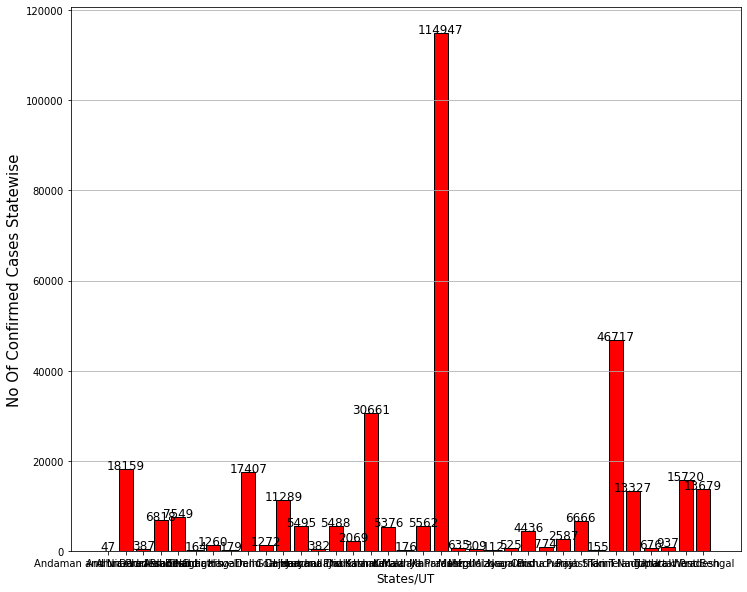

In [21]:
fig=plt.figure(figsize=(12,10))
plt.bar(state_data["States"],state_data["Confirmed"],color='red',edgecolor='black')
plt.xlabel('States/UT',fontsize=12)
plt.grid(axis='y')
import numpy as np
plt.yticks()
plt.ylabel('No Of Confirmed Cases Statewise',fontsize=15)

#values of bar
for index,y in enumerate(state_data["Confirmed"]):
  plt.text(index,y+10,str(y),fontsize=12,horizontalalignment='center')

# plt.savefig('Graph_Of_CovidCases.png',pad_inches=0,edgecolor='black', bbox_inches = 'tight')
plt.show()

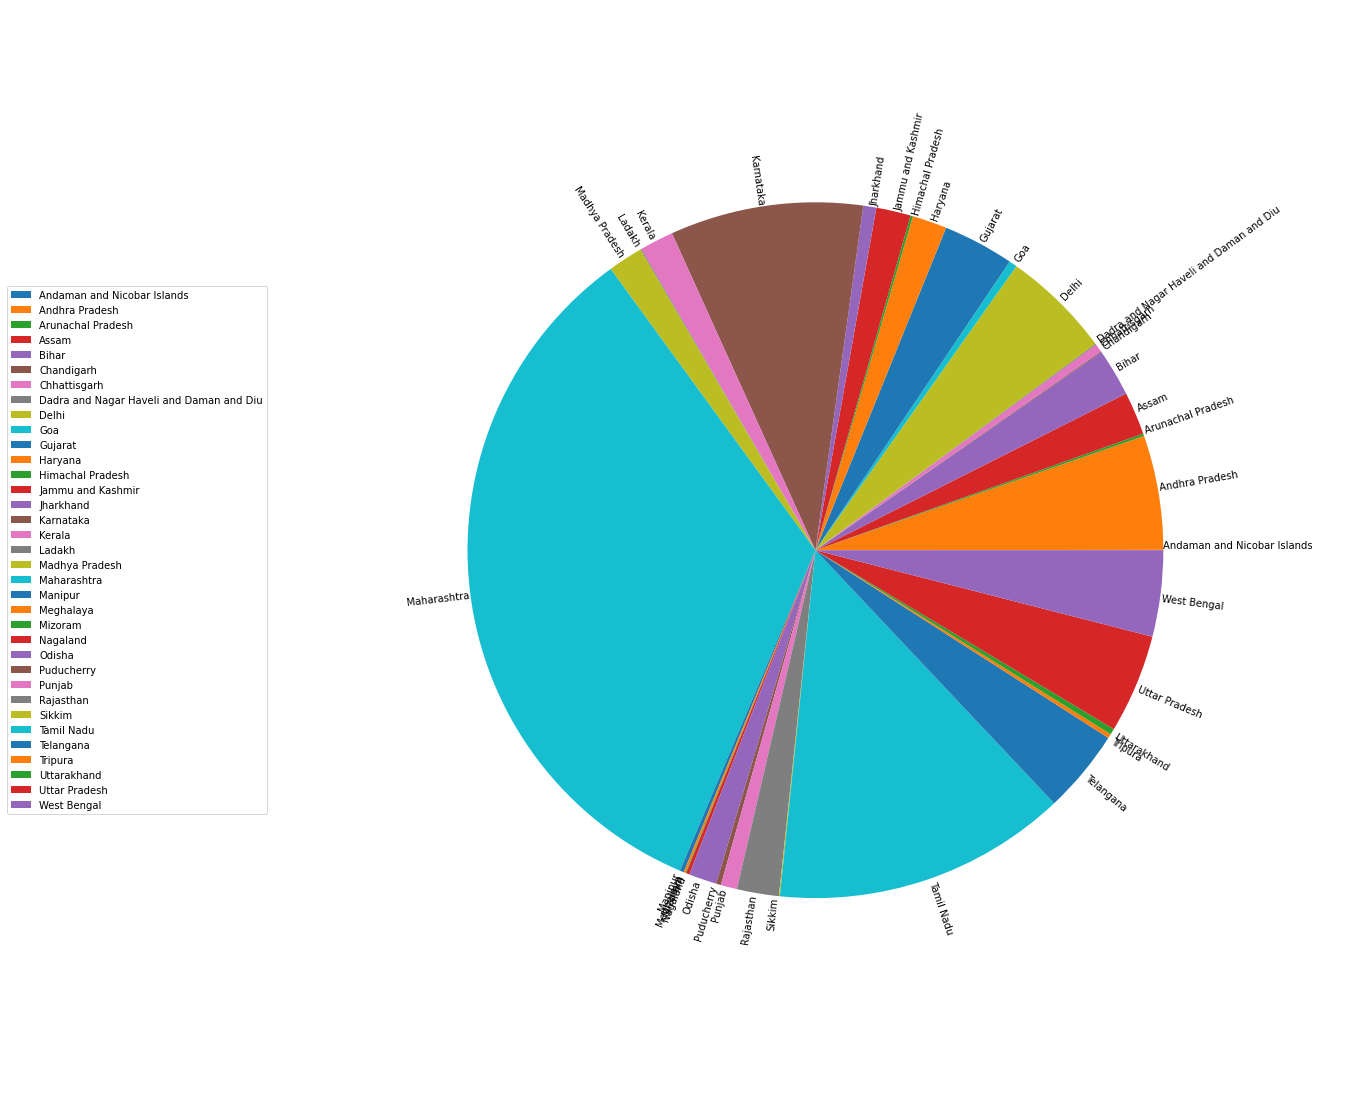

In [24]:
fig=plt.figure(figsize=(20,20))
fig.patch.set_facecolor('White')

plt.pie(state_data['Confirmed'],labels=state_data['States'],rotatelabels=True,radius=0.8,labeldistance=1)
plt.legend(loc='right',bbox_to_anchor=(0,.5))
plt.show()

In [25]:
state_data['Confirmed'].sum()
a=[state_data["Confirmed"].sum(),state_data["Recovered"].sum(),state_data["Death"].sum()]
label=["Confirmed","Recoverd","Death"]
custom_color=['skyblue','yellow','tomato']

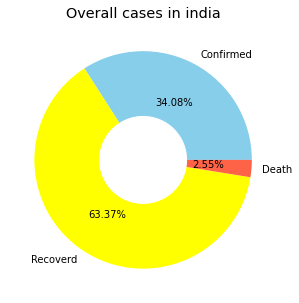

In [26]:
fig=plt.figure(figsize=(5,5))
fig.patch.set_facecolor('White')

plt.pie(a,labels=label,colors=custom_color,autopct='%.2f%%')
central_circle = plt.Circle((0,0), 0.4, color = 'white')
fig=plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font',size=12)
plt.title('Overall cases in india')
plt.show()

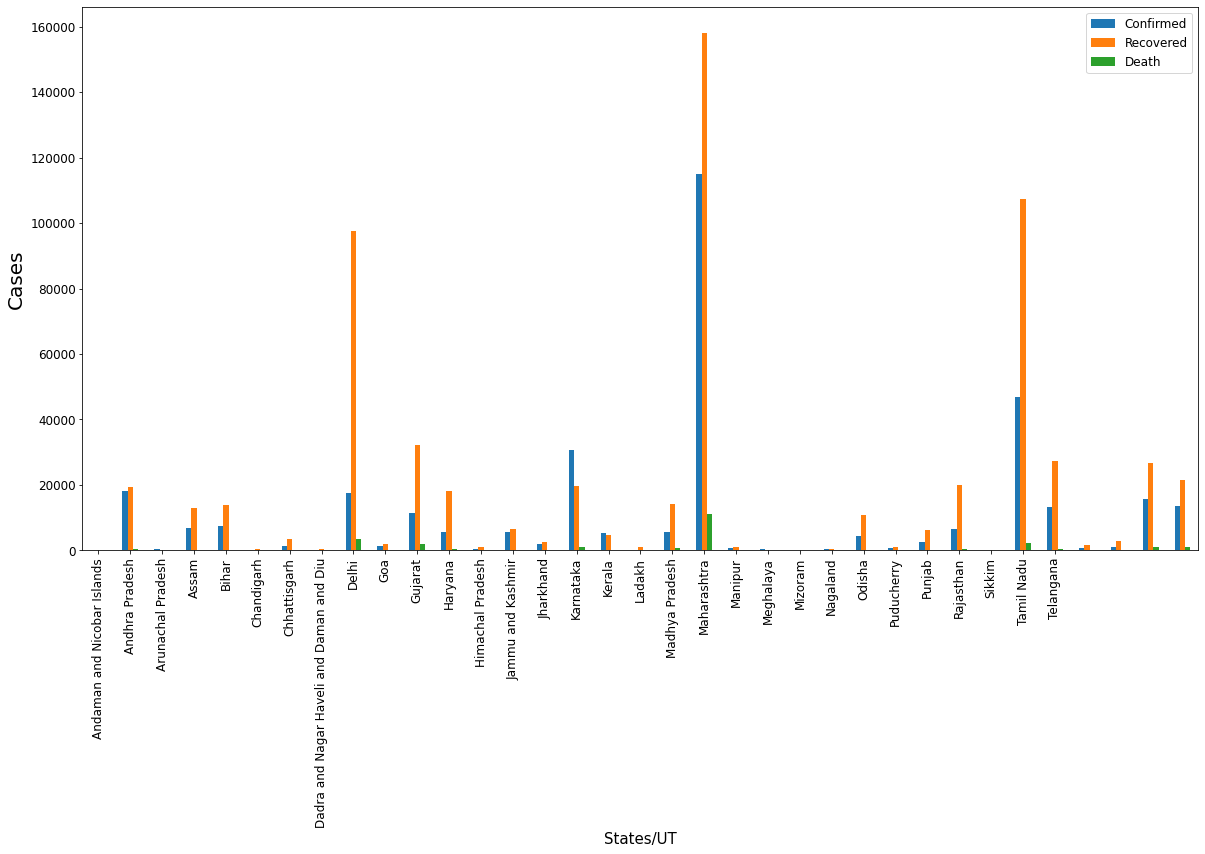

In [27]:
state_data1=state_data.iloc[:,[1,2,3,4]]
plt.rcParams['figure.figsize']=(20,10)
state_data1.plot.bar()
plt.xlabel('States/UT',fontsize=15)
plt.ylabel('Cases',fontsize=20)

plt.xticks(np.arange(0,31,1),labels=state_data1['States'],rotation=90)
plt.show()

In [33]:
print("Confirmed cases - ",state_data.Confirmed.sum())
print("Recovered cases - ",state_data.Recovered.sum())
print("Death cases - ",state_data.Death.sum())

Confirmed cases -  341942
Recovered cases -  635757
Death cases -  25602


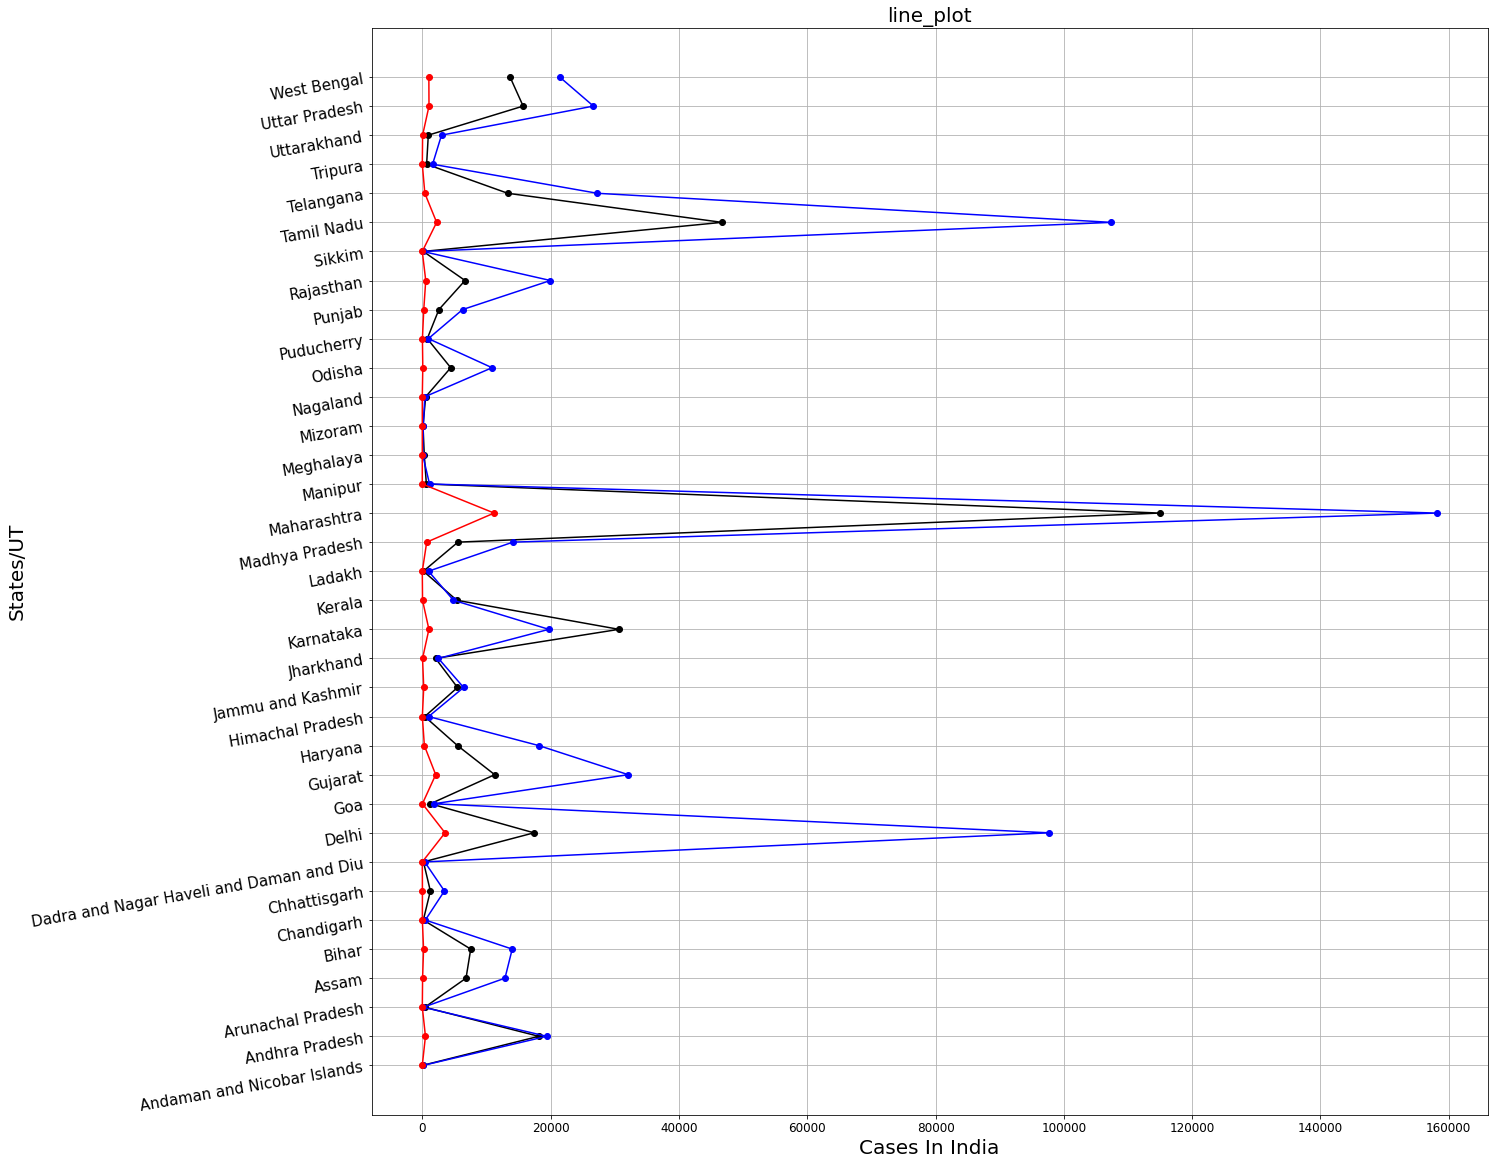

In [34]:
fig=plt.figure(figsize=(20,20))
plt.plot(state_data.Confirmed,state_data.States,marker='o',color='k')
plt.plot(state_data.Recovered,state_data.States,marker='o',color='blue')
plt.plot(state_data.Death,state_data.States,marker='o',color='red')
plt.xlabel("Cases In India",fontsize=20)
plt.ylabel("States/UT",fontsize=20)
plt.yticks(rotation=10,fontsize=15)
plt.grid(axis='both')
plt.title("line_plot",fontsize=20)
plt.show()